# The Normalization of training and validation set has been missed for the better result.

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

In [6]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step 


In [7]:
base_model.trainable=False

In [8]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\ACER\gitClones\ML_ProffCourseDatasets\train",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\ACER\gitClones\ML_ProffCourseDatasets\test",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5001 files belonging to 2 classes.


In [12]:
history = model.fit(
    train_ds,
    epochs=7,
    validation_data=validation_ds
)

Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 507s 799ms/step - accuracy: 0.5717 - loss: 3.1285 - val_accuracy: 0.6375 - val_loss: 0.6394
Epoch 2/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 495s 791ms/step - accuracy: 0.5752 - loss: 0.6682 - val_accuracy: 0.6415 - val_loss: 0.6395
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 494s 790ms/step - accuracy: 0.5987 - loss: 0.6551 - val_accuracy: 0.5107 - val_loss: 0.6730
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 509s 814ms/step - accuracy: 0.5519 - loss: 0.6724 - val_accuracy: 0.6223 - val_loss: 0.6542
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 661s 1s/step - accuracy: 0.5820 - loss: 0.6545 - val_accuracy: 0.6257 - val_loss: 0.6575
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 660s 1s/step - accuracy: 0.5879 - loss: 0.6577 - val_accuracy: 0.6575 - val_loss: 0.6400
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 579s 926ms/step - accuracy: 0.6056 - loss: 0.6519 - val_accuracy: 0.6469 - val_loss: 0.6357


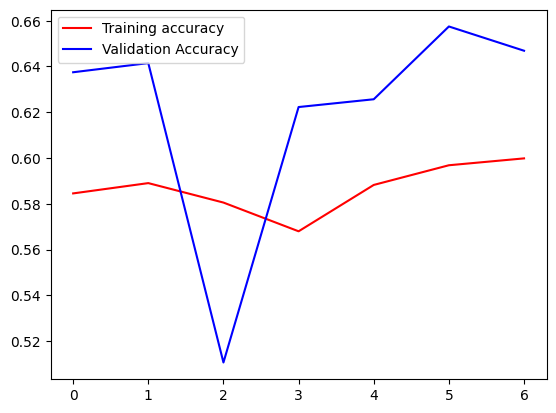

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], c='red', label='Training accuracy')
plt.plot(history.history['val_accuracy'], c='blue', label='Validation Accuracy')
plt.legend()
plt.show()

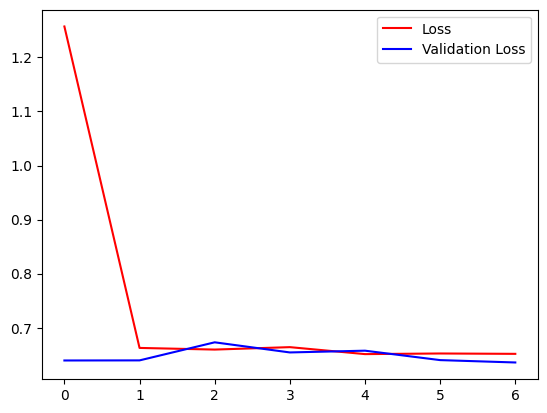

In [14]:
plt.plot(history.history['loss'], c='red', label='Loss')
plt.plot(history.history['val_loss'], c='blue', label='Validation Loss')
plt.legend()
plt.show()